In [1]:
import mysql.connector as connection
import pandas as pd
try:
    mydb = connection.connect(host="localhost", database = 'plotingdb',user="root", passwd="",use_pure=True)
    query = "select * from ranges;"
    result_dataFrame = pd.read_sql(query,mydb)
    mydb.close() #close the connection
except Exception as e:
    mydb.close()
    print(str(e))

hello


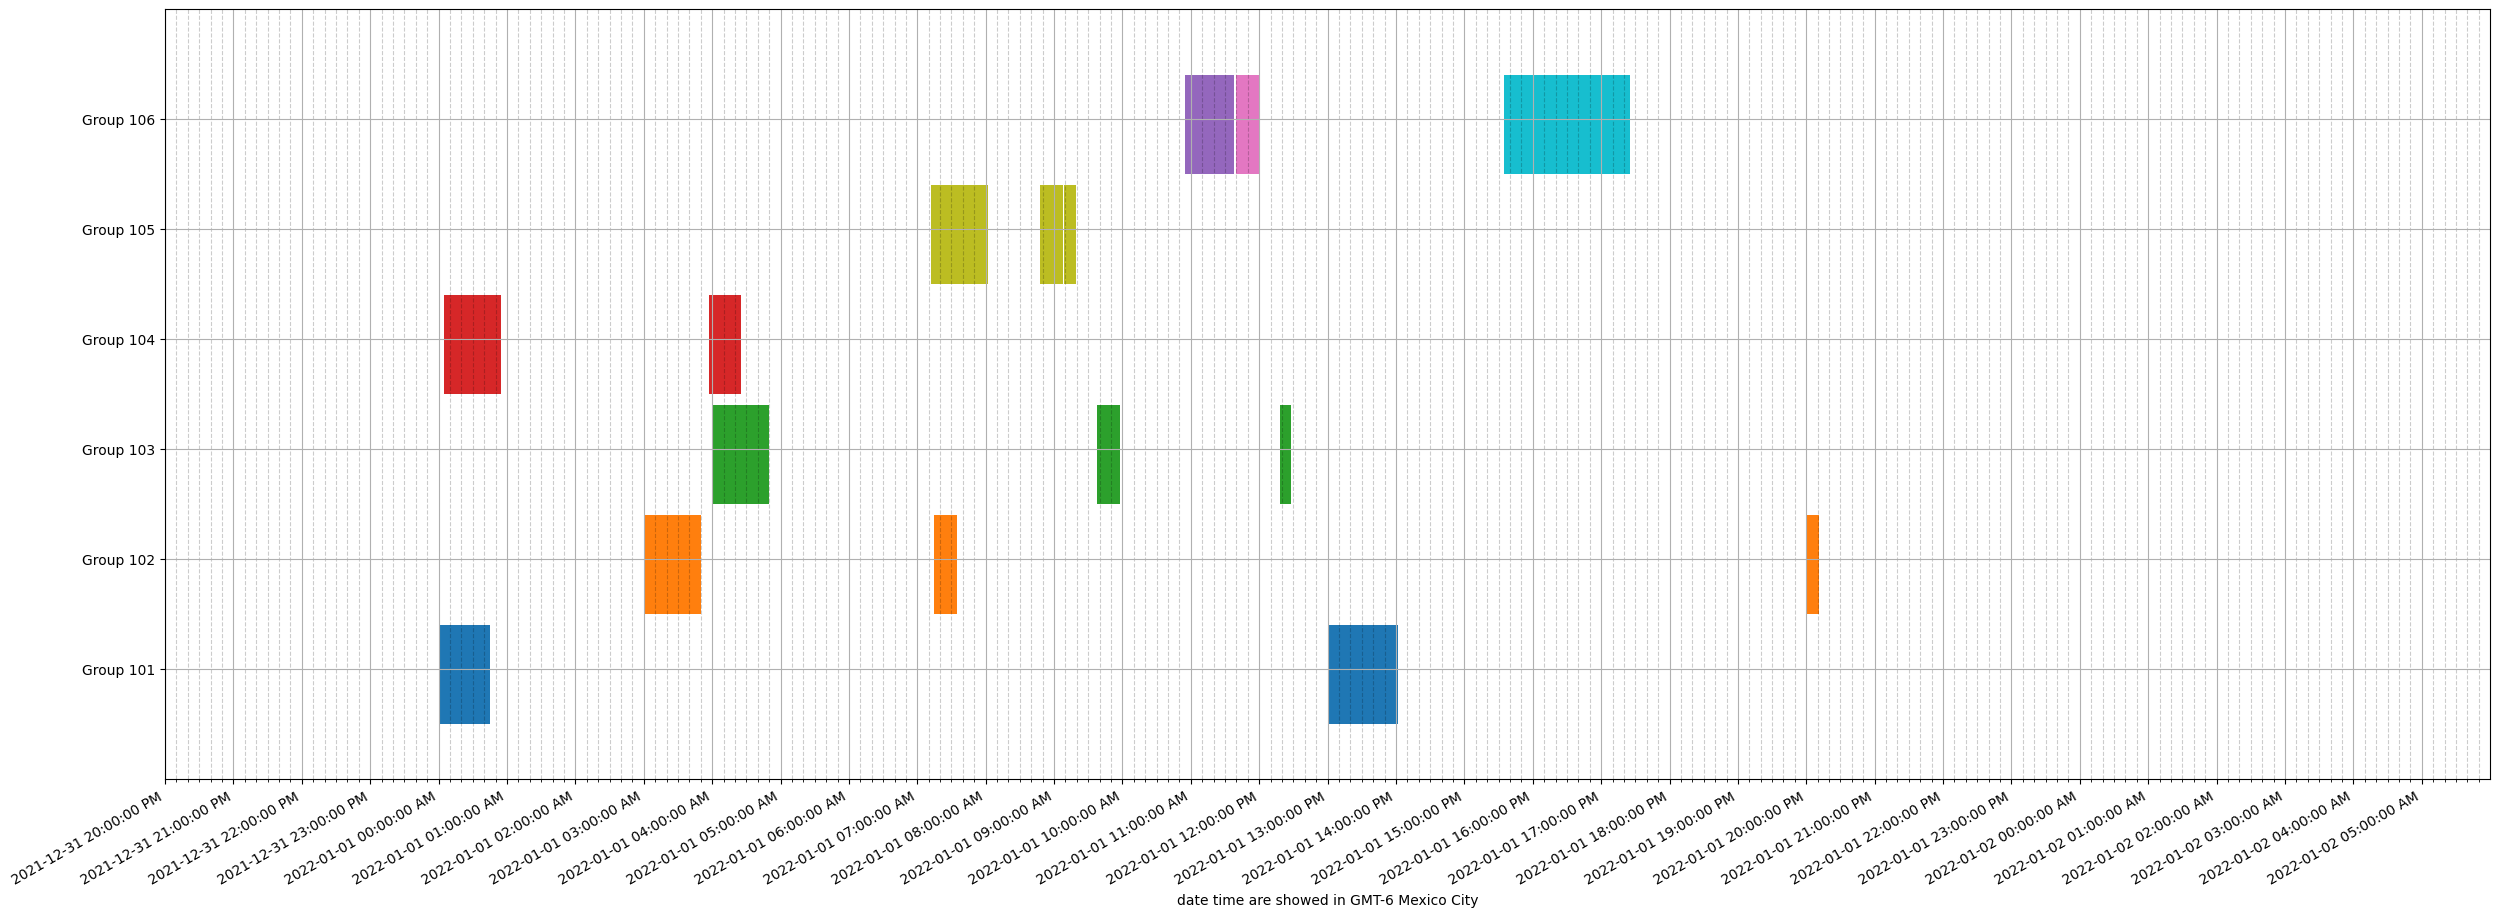

In [29]:
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

# Horizontal bar plot with gaps

fig, ax = plt.subplots()
fig.set_figheight(10.0)
fig.set_figwidth(30.0)

ax.broken_barh([(datetime(2022, 1, 1,0,0,0), timedelta(minutes=45)), (datetime(2022, 1, 1, 13,0,0), timedelta(minutes=62))], (10, 9), facecolors='tab:blue')

ax.broken_barh([(datetime(2022, 1, 1,3,0,0), timedelta(minutes=50)), (datetime(2022, 1, 1,7,15,0), timedelta(minutes=20)), (datetime(2022, 1, 1,20,1,0), timedelta(minutes=10))], (20, 9),
               facecolors='tab:orange')

ax.broken_barh([(datetime(2022, 1, 1,4,0,0), timedelta(minutes=50)), (datetime(2022, 1, 1,9,38,0), timedelta(minutes=20)), (datetime(2022, 1, 1,12,18,0), timedelta(minutes=10))], (30, 9),
               facecolors='tab:green')

ax.broken_barh([(datetime(2022, 1, 1,0,5,0), timedelta(minutes=50)), (datetime(2022, 1, 1,3, 57,0), timedelta(minutes=20)), (datetime(2022, 1, 1,4,15,0), timedelta(minutes=10))], (40, 9),
               facecolors='tab:red')

ax.broken_barh([(datetime(2022, 1, 1,7,12,0), timedelta(minutes=50)), (datetime(2022, 1, 1,8,48,0), timedelta(minutes=20)), (datetime(2022, 1, 1,9,9,0), timedelta(minutes=10))], (50, 9),
               facecolors='tab:olive')

ax.broken_barh([(datetime(2022, 1, 1,10,55,0), timedelta(minutes=43)), (datetime(2022, 1, 1,11,40,0), timedelta(minutes=20)), (datetime(2022, 1, 1,15,35,0), timedelta(minutes=110))], (60, 9),
               facecolors=('tab:purple','tab:pink','tab:cyan'))

ax.set_ylim(5, 75)

ax.xaxis.set_major_locator(mdates.HourLocator())
ax.xaxis.set_minor_locator(mdates.MinuteLocator(byminute=[10,20,30,40,50]))

# Setting X-axis limits 
datemin = dt.datetime(2021, 12, 31,20,0,0)
datemax = dt.datetime(2022, 1, 2,5, 59,59)
ax.set_xlim(datemin, datemax)
ax.set_xlabel('date time are showed in GMT-6 Mexico City')

ax.set_yticks([15, 25, 35, 45, 55, 65], labels=['Group 101', 'Group 102','Group 103', 'Group 104','Group 105', 'Group 106'])     # Modify y-axis tick labels

ax.grid(True)                                       # Make grid lines visible
plt.grid(True, which='minor', color='black', linestyle='dashed', alpha=0.2)

#ax.annotate('race interrupted', (61, 25),
#            xytext=(0.8, 0.9), textcoords='axes fraction',
#            arrowprops=dict(facecolor='black', shrink=0.05),
#            fontsize=16,
#            horizontalalignment='right', verticalalignment='top')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S %p"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
plt.show()

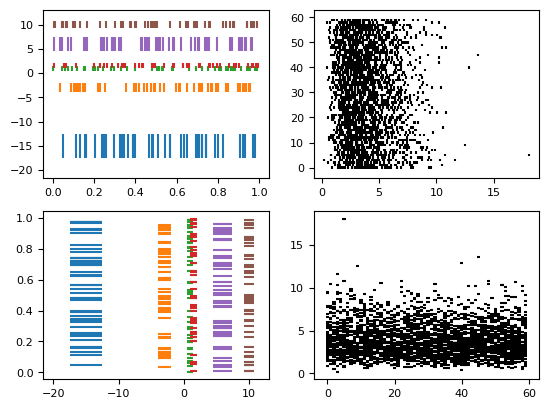

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

matplotlib.rcParams['font.size'] = 8.0

# Fixing random state for reproducibility
np.random.seed(19680801)#  w w   w   .  d  em   o 2  s    . c   o  m


# create random data
data1 = np.random.random([6, 50])

# set different colors for each set of positions
colors1 = ['C{}'.format(i) for i in range(6)]

# set different line properties for each set of positions
# note that some overlap
lineoffsets1 = [-15, -3, 1, 1.5, 6, 10]
linelengths1 = [5, 2, 1, 1, 3, 1.5]

fig, axs = plt.subplots(2, 2)

# create a horizontal plot
axs[0, 0].eventplot(data1, colors=colors1, lineoffsets=lineoffsets1,
                    linelengths=linelengths1)

# create a vertical plot
axs[1, 0].eventplot(data1, colors=colors1, lineoffsets=lineoffsets1,
                    linelengths=linelengths1, orientation='vertical')

# create another set of random data.
# the gamma distribution is only used for aesthetic purposes
data2 = np.random.gamma(4, size=[60, 50])

# use individual values for the parameters this time
# these values will be used for all data sets (except lineoffsets2, which
# sets the increment between each data set in this usage)
colors2 = 'black'
lineoffsets2 = 1
linelengths2 = 1

# create a horizontal plot
axs[0, 1].eventplot(data2, colors=colors2, lineoffsets=lineoffsets2,
                    linelengths=linelengths2)


# create a vertical plot
axs[1, 1].eventplot(data2, colors=colors2, lineoffsets=lineoffsets2,
                    linelengths=linelengths2, orientation='vertical')

plt.show()


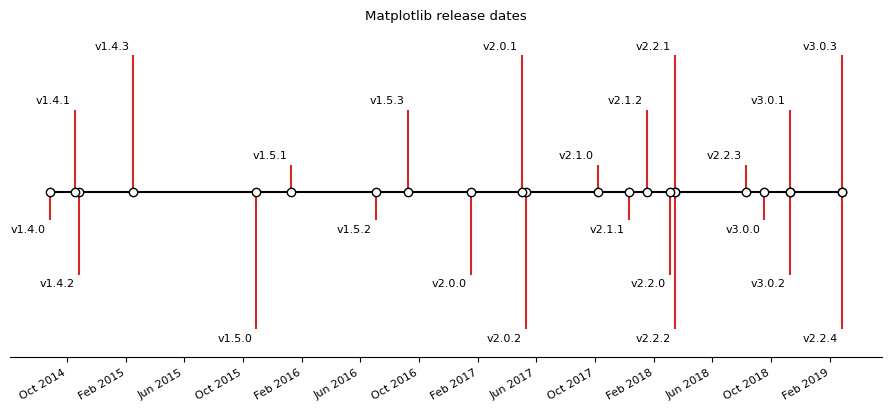

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

try:
    # Try to fetch a list of Matplotlib releases and their dates
    # from https://api.github.com/repos/matplotlib/matplotlib/releases
    import urllib.request
    import json

    url = 'https://api.github.com/repos/matplotlib/matplotlib/releases'
    url += '?per_page=100'
    data = json.loads(urllib.request.urlopen(url, timeout=.4).read().decode())

    dates = []
    names = []
    for item in data:
        if 'rc' not in item['tag_name'] and 'b' not in item['tag_name']:
            dates.append(item['published_at'].split("T")[0])
            names.append(item['tag_name'])
    # Convert date strings (e.g. 2014-10-18) to datetime
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

except Exception:
    # In case the above fails, e.g. because of missing internet connection
    # use the following lists as fallback.
    names = ['v2.2.4', 'v3.0.3', 'v3.0.2', 'v3.0.1', 'v3.0.0', 'v2.2.3',
             'v2.2.2', 'v2.2.1', 'v2.2.0', 'v2.1.2', 'v2.1.1', 'v2.1.0',
             'v2.0.2', 'v2.0.1', 'v2.0.0', 'v1.5.3', 'v1.5.2', 'v1.5.1',
             'v1.5.0', 'v1.4.3', 'v1.4.2', 'v1.4.1', 'v1.4.0']

    dates = ['2019-02-26', '2019-02-26', '2018-11-10', '2018-11-10',
             '2018-09-18', '2018-08-10', '2018-03-17', '2018-03-16',
             '2018-03-06', '2018-01-18', '2017-12-10', '2017-10-07',
             '2017-05-10', '2017-05-02', '2017-01-17', '2016-09-09',
             '2016-07-03', '2016-01-10', '2015-10-29', '2015-02-16',
             '2014-10-26', '2014-10-18', '2014-08-26']

    # Convert date strings (e.g. 2014-10-18) to datetime
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]
# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="Matplotlib release dates")

ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 4 month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)
plt.show()

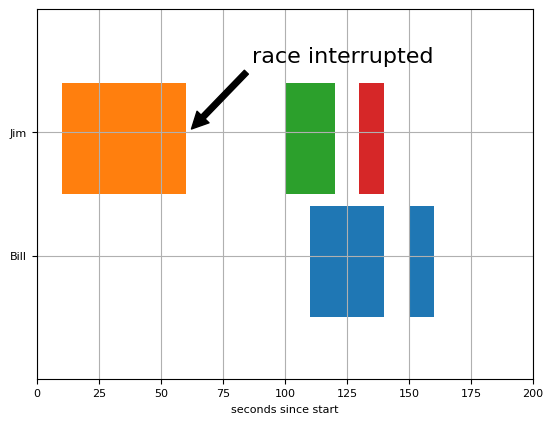

In [6]:
import matplotlib.pyplot as plt

# Horizontal bar plot with gaps
fig, ax = plt.subplots()
ax.broken_barh([(110, 30), (150, 10)], (10, 9), facecolors='tab:blue')
ax.broken_barh([(10, 50), (100, 20), (130, 10)], (20, 9),
               facecolors=('tab:orange', 'tab:green', 'tab:red'))
ax.set_ylim(5, 35)
ax.set_xlim(0, 200)
ax.set_xlabel('seconds since start')
ax.set_yticks([15, 25], labels=['Bill', 'Jim'])     # Modify y-axis tick labels
ax.grid(True)                                       # Make grid lines visible
ax.annotate('race interrupted', (61, 25),
            xytext=(0.8, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=16,
            horizontalalignment='right', verticalalignment='top')

plt.show()

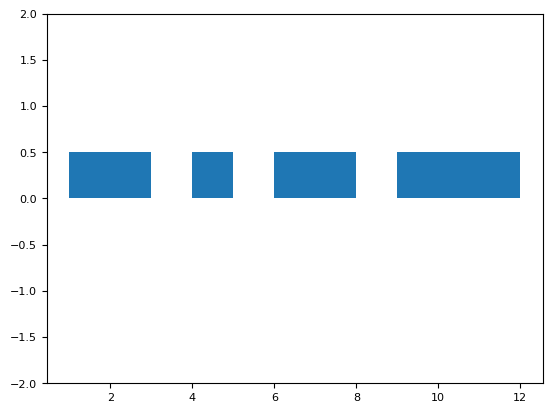

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({"begin": [1,4,6,9], "end" : [3,5,8,12]})

fig, ax = plt.subplots()

ax.broken_barh(list(zip(df["begin"].values, (df["end"] - df["begin"]).values)), (0, 0.5))

ax.set_ylim(-2,2)
plt.show()
